<a href="https://colab.research.google.com/github/soulaimane2/CNN_Small_Proj/blob/master/CNN_MNIST_FASHION_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.__version__

'2.2.0'

In [21]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train , x_test = x_train / 255., x_test / 255.
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [22]:
# the conv2d expects 3 dems so let's expand the dem
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
# let's check how many unique item we got
uniques = len(set(y_train))
uniques

10

In [0]:
# Now let's build the model
model = tf.keras.Sequential([
                            tf.keras.layers.Input(shape=x_train[0].shape),
                            tf.keras.layers.Conv2D(32,(3,3),strides=2,activation='relu'),
                             tf.keras.layers.Conv2D(64,(3,3), strides=2,activation='relu'),
                             tf.keras.layers.Conv2D(128,(3,3),strides=2, activation='relu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512,activation='relu'),
                             tf.keras.layers.Dense(uniques,activation='softmax')
])

In [0]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [26]:
r = model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4958 - accuracy: 0.8158
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3341 - accuracy: 0.8737
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2811 - accuracy: 0.8936
Epoch 4/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2442 - accuracy: 0.9079
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2139 - accuracy: 0.9179
Epoch 6/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1863 - accuracy: 0.9290
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1601 - accuracy: 0.9392
Epoch 8/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1396 - accuracy: 0.9463
Epoch 9/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1221 - accuracy: 0.9530
Epoch 10/15
1875/1875 [==============================] - 26s 14m

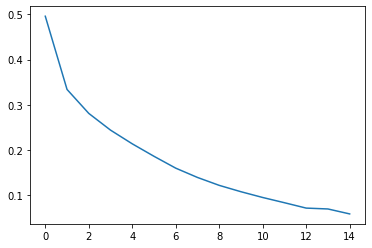

In [29]:
plt.plot(r.history['loss'],label = "Loss")
plt.show()

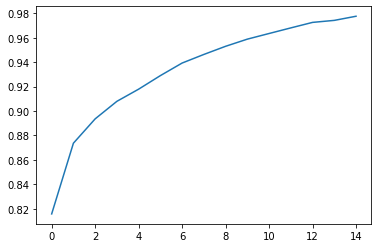

In [30]:
plt.plot(r.history['accuracy'],label = "accuracy")
plt.show()